In [ ]:
!pip install tensorflow opencv-python matplotlib


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

#input layer
def build_unet(input_shape=(128, 128, 3)):
    inputs = tf.keras.Input(shape=input_shape)

    #Encoder
    c1 = layers.Conv2D(16, 3, activation= 'relu', padding='same')(inputs)
    c1 = layers.Conv2D(16, 3, activation= 'relu', padding='same')(c1)
    p1 = layers.MaxPooling2D()(c1)

    c2 = layers.Conv2D(32, 3, activation= 'relu', padding='same')(p1)
    c2 = layers.Conv2D(32, 3, activation= 'relu', padding='same')(c2)
    p2 = layers.MaxPooling2D()(c2)

    # Bottleneck
    b = layers.Conv2D(64, 3, activation= 'relu', padding='same')(p2)
    b = layers.Conv2D(64, 3, activation= 'relu', padding='same')(b)


    # Decoder
    u1 = layers.UpSampling2D()(b)
    u1 = layers.concatenate([u1, c2])
    c3 = layers.Conv2D(32, 3, activation= 'relu', padding='same')(u1)
    c3 = layers.Conv2D(32, 3, activation= 'relu', padding='same')(c3)

    u2 = layers.UpSampling2D()(c3)
    u2 = layers.concatenate([u2, c1])
    c4 = layers.Conv2D(16, 3, activation= 'relu', padding='same')(u2)
    c4 = layers.Conv2D(16, 3, activation= 'relu', padding='same')(c4)

    outputs = layers.Conv2D(1, 1, activation='sigmoid')(c4)

    model = models.Model(inputs, outputs)
    return model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step


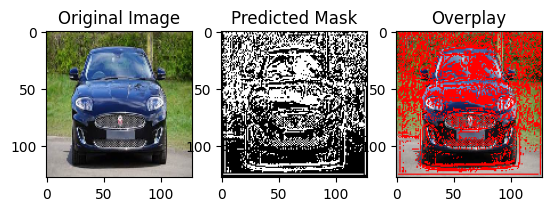

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Load image
image = cv2.imread('/content/drive/My Drive/photo.jpg')
image = cv2.resize(image, (128, 128))
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
input_image = image_rgb / 255.0 # Normalize
input_image = np.expand_dims(input_image, axis=0) # Add batch dimension

# Build and compile U-net
model = build_unet()
model.compile(optimizer='adam', loss='binary_crossentropy')

# Dummy prediction(random weights unless trained)
pred_mask = model.predict(input_image)[0, :, :, 0]
mask_bin = (pred_mask > 0.5).astype(np.uint8)

# Display
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image_rgb)
plt.subplot(1, 3, 2)
plt.title('Predicted Mask')
plt.imshow(mask_bin, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('Overplay')
overplay = image_rgb.copy()
overplay[mask_bin == 1] = [255, 0, 0]
plt.imshow(overplay)
plt.show()


In [ ]:
from PIL import Image, ImageEnhance, ImageOps
import matplotlib.pyplot as plt


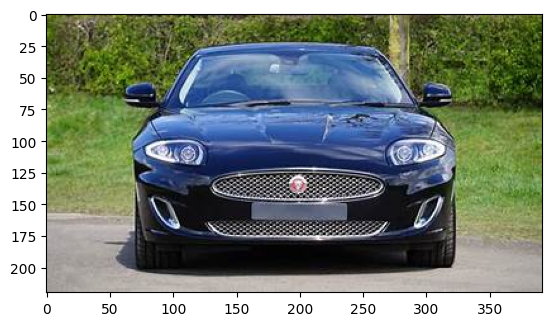

In [ ]:
image_path = "/content/drive/My Drive/photo.jpg"
img = Image.open(image_path)

plt.imshow(img)


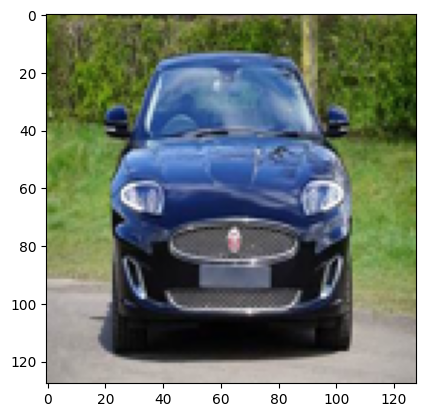

In [ ]:
resized_img = img.resize((128,128))
plt.imshow(resized_img)


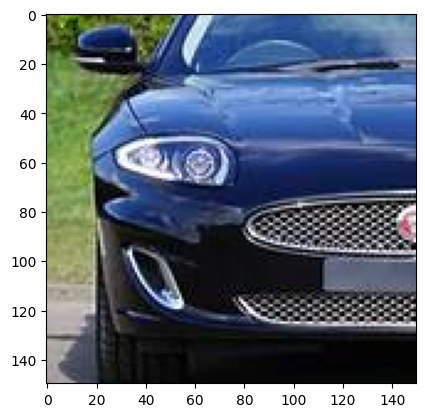

In [ ]:
cropped_img = img.crop((50, 50, 200, 200))
plt.imshow(cropped_img)

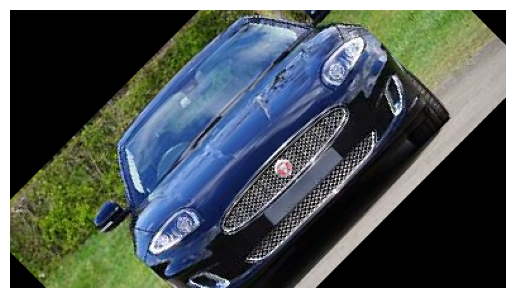

In [ ]:
rotated_img = img.rotate(45)
plt.imshow(rotated_img)
plt.axis('off')
plt.show()

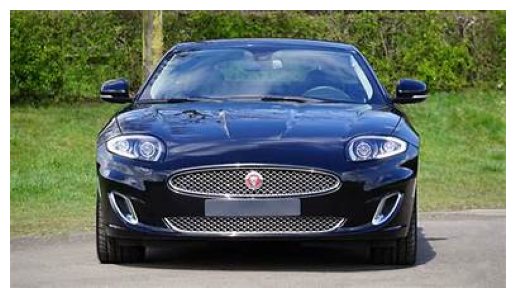

In [ ]:
mirrored_img = ImageOps.mirror(img)
plt.imshow(mirrored_img)
plt.axis('off')
plt.show()

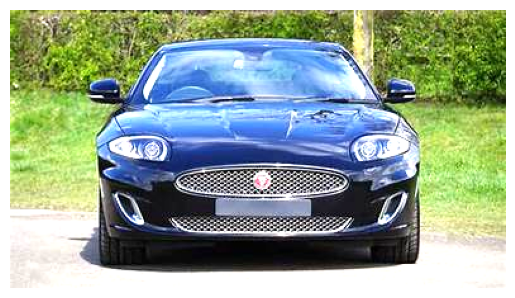

In [ ]:
enhancer_brightness = ImageEnhance.Brightness(img)
brighter_img = enhancer_brightness.enhance(1.5)
plt.imshow(brighter_img)
plt.axis('off')
plt.show()

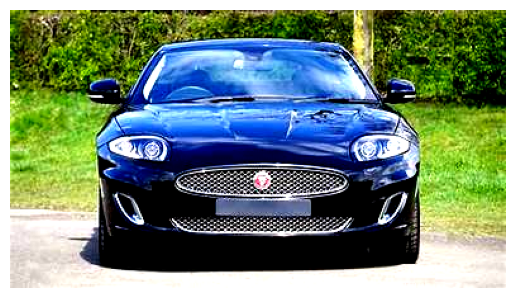

In [ ]:
enhancer_contrast = ImageEnhance.Contrast(img)
high_contrast_img = enhancer_contrast.enhance(2.0)
plt.imshow(high_contrast_img)
plt.axis('off')
plt.show()


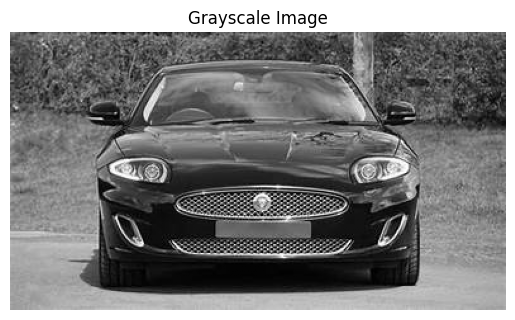

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('/content/drive/My Drive/photo.jpg')
'''It converts a color image(usually loaded with cv2.imread(),
which uses BGR(Blue-Green-Red)formatby default) to grayscale image.
by removing color information and keeping intensity luminace only'''

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


plt.imshow(gray_image,cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

In [ ]:
#Working with images:
It is a fundamental task in computer vision and machine learning applications.It
 involves loading,preprocessing, augementations and visualizing images to
 prepare them for task such as classifications, object detection, segmentation
 etc

SyntaxError: invalid syntax (ipython-input-19-2995944366.py, line 2)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Shape: (220, 392, 3)


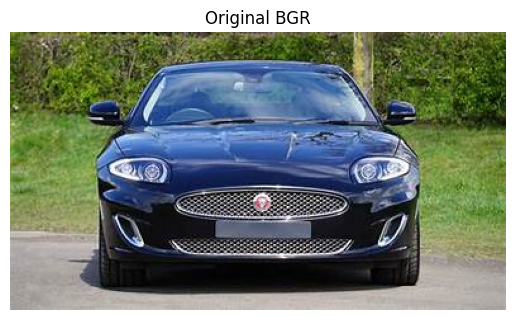

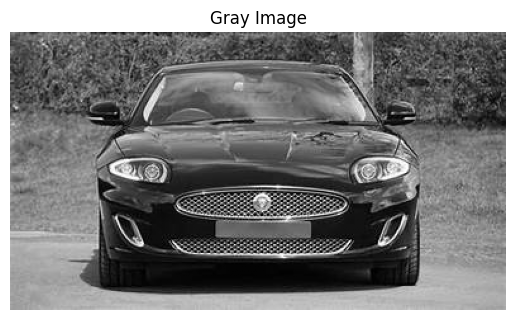

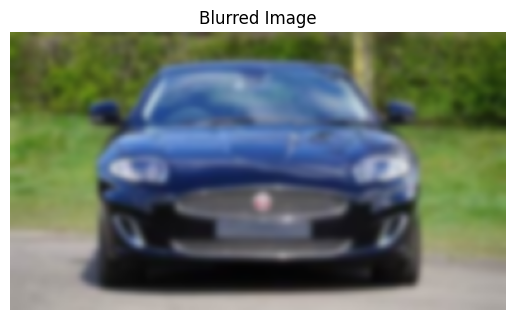

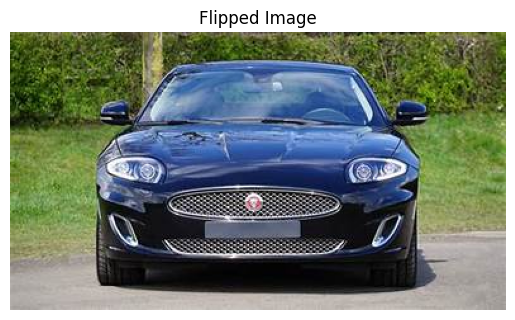

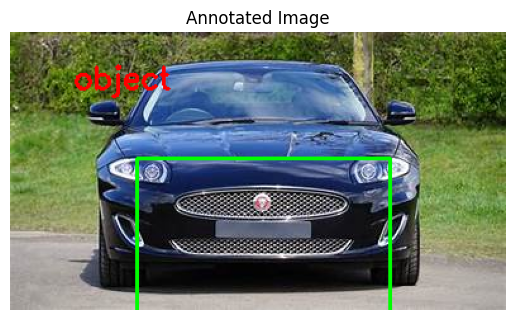

Batch size: 1 Image shape: (128, 128, 3)
Metadata: {'filename': 'image.jpg', 'label': 'cat', 'bbox': [50, 50, 200, 200]}


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "/content/drive/My Drive/photo.jpg"
image_bgr = cv2.imread(image_path)

print("Shape:", image_bgr.shape)

image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)


image_resized = cv2.resize(image_bgr, (256, 256))
image_blurred = cv2.GaussianBlur(image_bgr, (15, 15), 0)
image_normalized = image_bgr / 255

image_flipped = cv2.flip(image_bgr, 1)
image_rotated = cv2.rotate(image_bgr, cv2.ROTATE_90_CLOCKWISE)

def show_image(title, img , is_bgr= True):
    plt.figure()
    if is_bgr and len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
    plt.title(title)
    plt.axis('off')
    plt.show()

show_image('Original BGR', image_bgr)
show_image('Gray Image', image_gray , is_bgr=False)
show_image('Blurred Image', image_blurred)
show_image('Flipped Image', image_flipped)

annotated = image_bgr.copy()
cv2.rectangle(annotated, (100, 100), (300, 300), (0, 255, 0), 2)
cv2.putText(annotated, 'object', (50, 45), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
show_image('Annotated Image', annotated)

cv2.imwrite('output_gray.jpg',image_gray)

image_paths = ['/content/drive/My Drive/photo.jpg']
batch = [cv2.resize(cv2.imread(path), (128, 128)) for path in image_paths]
print("Batch size:", len(batch), "Image shape:",batch[0].shape)

metadata = {
    "filename": "image.jpg",
    "label":"cat",
    "bbox": [50, 50, 200, 200]
}
print("Metadata:",metadata)

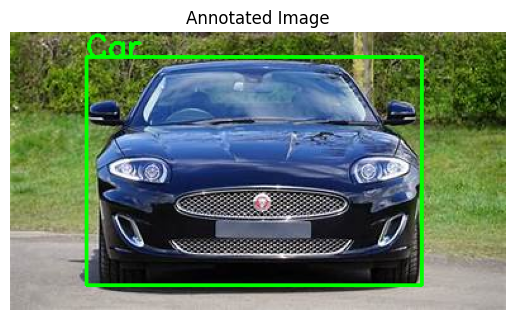

In [ ]:
annotated = image_bgr.copy()
cv2.rectangle(annotated, (60, 20), (325, 200), (0, 255, 0), 2)
cv2.putText(annotated, "Car", (60, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255,0), 2)
show_image("Annotated Image", annotated)

In [ ]:
KEY CONCEPT:
1.Image loading
2.Image Representation
3.Color Spaces
4.Image Preprocessing
5.Image Augmentation
6.Image Visualization
7.Image Annotation
8.Data Formats and storage
9.Batch Preprocessing
10.Metadata Handling

In [ ]:
Working with Videos(key Concept)
KEY CONCEPT
1.Video Capture Load a video file or webcam feed using cv2.VideoCapture
2.Frame-by-frame Processing Read each frame in a loop and apply Processing
3.Displaying Video Use cv2.imshow() to view frames in real time
4.Saving Video write frames to a file using cv2.VideoWriter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import matplotlib.pyplot as plt

video_path = '/content/drive/My Drive/video.mp4'
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error opening video file")
    exit()

fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print(f"Video Properties: {fps:.2f} FPS, {width}x{height}")

fourcc = cv2.VideoWriter_fourcc(* "XVID")
out = cv2.VideoWriter('output_video.mp4', fourcc, fps, (width, height))

def show_frame(frame, title='Frame'):
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

while True:
    ret, frame = cap.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    color_output = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

    out.write(color_output)
    #show frame
    show_frame(gray,'Video (Grayscale)')
    #Press 'q' to quit early
    #if cv2.waitkey(1) & 0xFF == ord('q'):
    #break

#6.Release everything
cap.release()
out.release()
cv2.destroyAllWindows()



Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import cv2
import matplotlib.pyplot as plt

video_path = '/content/drive/My Drive/video.mp4'
cap = cv2.VideoCapture(video_path)
i = 0
if not cap.isOpened():
    print("Error opening video file")
    exit()

fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print(f"Video Properties: {fps:.2f} FPS, {width}x{height}")

fourcc = cv2.VideoWriter_fourcc(* "XVID")
out = cv2.VideoWriter('output_video.mp4', fourcc, fps, (width, height))

def show_frame(frame, title='Frame'):
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

while True:
    ret, frame = cap.read()
    if not ret or i ==10:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blured = cv2.GaussianBlur(gray,(5,5),0)
    edges = cv2.Canny(blured,50,150)
    plt.imshow(frame)
    plt.title('Original')
    plt.axis('off')
    plt.show()
    plt.imshow(edges)
    plt.title('Edges')
    plt.axis('off')
    plt.show()
    i = i+1

#6.Release everything
cap.release()
out.release()
cv2.destroyAllWindows()




Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!pip install mediapipe


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 22.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
ydf 0.12.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.8 which is incompatible.
grpcio-